# 1. はじめに

このCodeは、[リンクアンドモチベーション Advent Calendar 2024](https://qiita.com/advent-calendar/2024/lmi)の24日目の記事です。
私は現在ソフトウェアエンジニアとして働いていますが、2024年は個人的にデータサイエンスまわりに興味を持った年でした。
その中で社内で週1程度行っているデータサイエンス関連の勉強会に参加し、データサイエンティストの方と一緒に[［第3版］Python機械学習プログラミング 達人データサイエンティストによる理論と実践](https://book.impress.co.jp/books/1120101017)を読む機会がありました。
本で紹介されていた、SVMを使って非線形問題を解くことが面白いと感じたので、題材にして記事を書きます。具体的には、2次元上で線形分類できないデータセットに対し、カーネルSVMの基本的な考え方である**高次元へ射影して線形分離できるようにする**を可視化することで理解を深めることを目的とします。

# 2. 準備

基本的なライブラリをインポートしておきます。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 3. 使用するデータセット

上記書籍で題材として作成されているのは、NumPyの`logical_xor`関数（排他的論理和）を用いたデータセットですが、ここでは（どうせなので）別のデータとして、[scikit-learnのmake_moons](https://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_moons.html) を用います。
このデータは、半月状に分布する2次元のデータであり、直線では分離できない構造を持ちます。

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1)

次のように散布図を描画すると、make_moons感が出ます🌛。
ひとまず上記では、`n_samples`や`noise`は適当に設定しましたが、次の記事で各パラメータに対する影響をわかりやすく紹介してくださっています：[[scikit-learn] 4. make_moonsによる三日月状データの生成](https://sabopy.com/py/scikit-learn-4/)

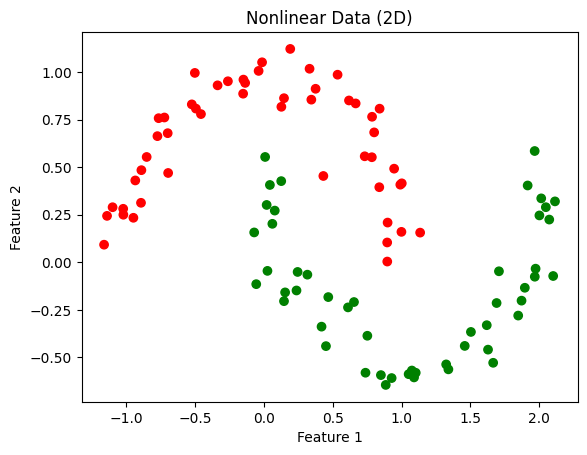

In [3]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['red', 'green'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap)
plt.title("Nonlinear Data (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
# plt.title("Nonlinear Data (2D)")
# plt.show()

# 4. 2次元平面での非線形分離

非線形なデータを分類するため、モデルを構築し、学習します。ここでは、RBFカーネルSVMを用いています。

In [5]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0, gamma=0.5)
model.fit(X, y)

SVC(gamma=0.5)

モデルに予測するため、グリッドを生成します。

In [6]:
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 200), np.linspace(-1, 1.5, 200))

モデルによる予測をします。

In [7]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

決定境界を含めて、描画します。

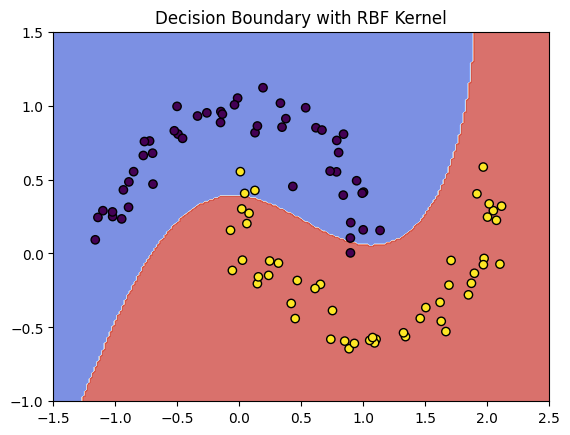

In [8]:
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
# plt.contourf(xx, yy, Z, alpha=0.75, cmap=custom_cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Decision Boundary with RBF Kernel")
plt.show()

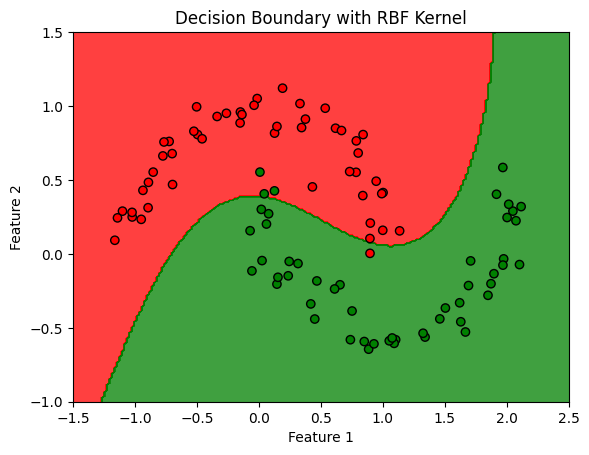

In [9]:
from matplotlib.colors import ListedColormap

# 赤と緑のカラーマップを定義
custom_cmap = ListedColormap(['red', 'green'])

# 決定境界をプロット
plt.contourf(xx, yy, Z, alpha=0.75, cmap=custom_cmap)

# データポイントをプロット
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=custom_cmap)
plt.title("Decision Boundary with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 5. 3次元空間への射影

RBFカーネルに基づく特徴量の生成をします。

In [10]:
def rbf_projection(X, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(X, axis=1)**2)

新しい次元を追加し、新しい特徴量を生成します。

In [11]:
Z = rbf_projection(X)
X_projected = np.hstack((X, Z.reshape(-1, 1)))

諸々3次元にプロットします。

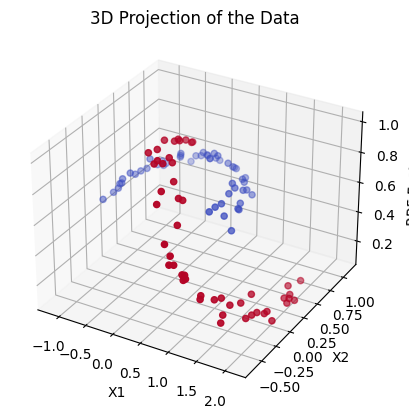

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=y, cmap=plt.cm.coolwarm)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('RBF Feature')
plt.title("3D Projection of the Data")
plt.show()

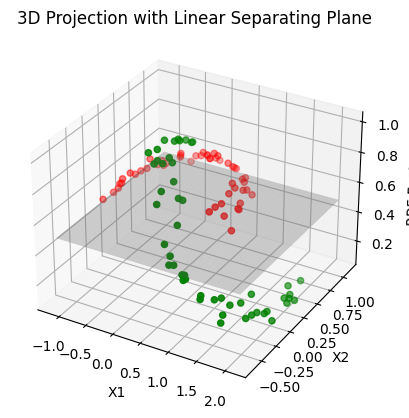

In [13]:
from matplotlib.colors import ListedColormap

# 赤と緑のカラーマップを定義
custom_cmap = ListedColormap(['red', 'green'])

# グリッドの作成
xx, yy = np.meshgrid(np.linspace(X_projected[:, 0].min(), X_projected[:, 0].max(), 50),
                     np.linspace(X_projected[:, 1].min(), X_projected[:, 1].max(), 50))
zz = np.full(xx.shape, 0.5)  # 平面の高さを一定に設定

# 3Dプロットの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# データポイントのプロット（赤と緑の色分け）
ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=y, cmap=custom_cmap)

# 平面（超平面）のプロット
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

# 軸ラベルとタイトルの設定
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('RBF Feature')
plt.title("3D Projection with Linear Separating Plane")

plt.show()

# 6. 3次元空間での線形分離

こちらも同様にプロットする。

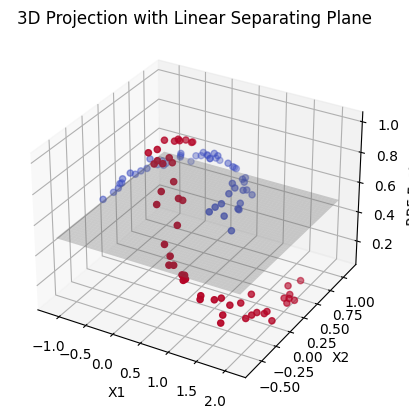

In [14]:
xx, yy = np.meshgrid(np.linspace(X_projected[:, 0].min(), X_projected[:, 0].max(), 50),
                     np.linspace(X_projected[:, 1].min(), X_projected[:, 1].max(), 50))
zz = np.full(xx.shape, 0.5)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=y, cmap=plt.cm.coolwarm)
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('RBF Feature')
plt.title("3D Projection with Linear Separating Plane")
plt.show()